## Assignment 3 Part 1

Attempting this part will take approximately 2 hours.

### **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
import matplotlib.pyplot as plt
plots.style.use('fivethirtyeight')


# **Instructions**

How to run this on Google Colab: Uncomment the code cells below and place your csv files on Drive to run this assignment on Google Colab (only if you want to - jupyter notebooks work just fine)

In [3]:
'''
Linking google colab to your drive folder
'''
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
'''
Place the csv files inside your drive and then run this cell
'''
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Submission Instructions**

* You should name the notebook as **YourRollNumber_PartNumber.ipynb**. (e.g. this part should be named as *`2XXXXXXX_1.ipynb`*)
* You must submit a zip file containg just the notebook and it must not have any folder or any other file. 
* The name of the zip file must be your `Roll Number`

### **Pima Indian Diabetes Dataset**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Run the cell below to load the dataset and explore its attributes for a study conducted for 786 patients in 1990

### **Loading Data**

In [6]:
pima = pd.read_csv('diabetes_study.csv')
pima

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1
...,...,...,...,...,...,...,...,...,...,...
609,14,1,189,60,23,846,30.1,0.398,59,1
610,555,1,84,64,23,115,36.9,0.471,28,0
611,730,2,92,52,0,0,30.1,0.141,22,0
612,103,0,125,96,0,0,22.5,0.262,21,0


What do these attributes mean?

    p_id : patient ID
    
    no_time_pregnant: Number of times pregnant

    glucose_concentration: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

    blood_pressure: Diastolic blood pressure (mm Hg)

    skin_fold_thickness: Triceps skin fold thickness (mm)

    serum_insulin: 2-Hour serum insulin (mu U/ml)

    bmi: Body mass index (weight in kg/(height in m)^2)

    diabetes pedigree: Diabetes pedigree function

    age: Age (years)

    diabetes: 1 if diabetes, 0 if no diabetes


Each row represents one patient who has been surveyed. The initial columns represent the patient's condiiton when they came for a checkup and the last column `diabetes` represents whether they were diagnosed with diabetes or not. 

This data has been cleaned to remove any nulll values so that there are none. Therefore, the data's rows may be lesser than the original study that was conducted.

**Question 1**: Print the dataset's description in the following cell and check whether any null values exist. (3)

In [7]:
#Enter code here
#display(pima.info())
#display(pima.isnull().sum())
#pima.shape
pima_col=pima.columns.to_list()
for column in pima_col:
  p=(pima[column].isnull()==True)
  if (pima[p].empty):
    display(str(column)+ " contains no Null value")
  else:
    display(str(column)+ " contains Null value")

'p_id contains no Null value'

'no_times_pregnant contains no Null value'

'glucose_concentration contains no Null value'

'blood_pressure contains no Null value'

'skin_fold_thickness contains no Null value'

'serum_insulin contains no Null value'

'bmi contains no Null value'

'diabetes pedigree contains no Null value'

'age contains no Null value'

'diabetes contains no Null value'

### Diabetes and the population

In this section, we will be exploring whether this dataset is a representative sample of population by examining the patients under this survey. This will help us highlights the limitations of the dataset.

[According to The Lancet Global Health](https://www.researchgate.net/publication/329604943_The_increasing_burden_of_diabetes_and_variations_among_the_states_of_India_the_Global_Burden_of_Disease_Study_1990-2016), the prevalence of diagnosed diabetes (i.e., the proportion of the population who have it) in India around this time was 0.055. We are going to conduct a hypothesis test with the following null and alternative hypotheses:

**Null Hypothesis**: The probability that a participant within the Pima Study has diabetes is equivalent to the prevalence of diagnosed diabetes within the population. (i.e., any difference between the study prevalence and population prevalence is due to random chance in the selection of the participants).

**Alternative Hypothesis**: The probability that a participant within the Pima Study has diabetes is different than the prevalence of diagnosed diabetes within the population.

We are going to use the absolute distance between the observed prevalence and the true population prevalence as our test statistic. 

**Question 2**: What is the observed value of the statistic in the data from the Pima Indian Diabetes Dataset? (5)

In [8]:

total=pima['diabetes'].value_counts()
pdia=total[1]/(total[0]+total[1])
print("observed statistic of people with diabetes:",pdia)
print("observed statistic of people not having diabetes:",1-pdia)


observed statistic of people with diabetes: 0.3485342019543974
observed statistic of people not having diabetes: 0.6514657980456027


**Question 3**: Make a function that returns a simulated statistic under the null hypothesis. (7)

**IMPORTANT NOTE:** Look into the [np.random.multinomial](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multinomial.html) function for simulating the statistic.

In [9]:
#Enter code here
def null_hyp(n,p,size=1):
  nul=np.random.multinomial(n,p,size=size)
  return (nul/n)

**Question 4**: Use this function to simulate 5000 values of the statistic under null hypothesis (7)

In [10]:
#Enter code here
p=[1-0.055,0.055]
n=100
size=5000
sample=null_hyp(n,p,size)
display(sample)

array([[0.93, 0.07],
       [0.97, 0.03],
       [0.95, 0.05],
       ...,
       [0.92, 0.08],
       [0.97, 0.03],
       [0.94, 0.06]])

**Question 5**: Generate a histogram of the simulated values of your statistic, along with the observed value. (4)

*Explain what this histogram displays.*

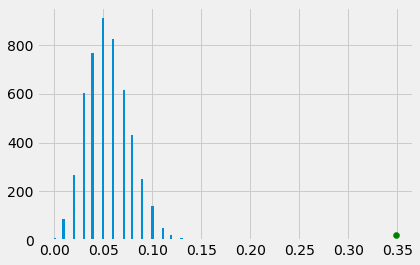

In [22]:
#Enter code and comment here
histo=pd.DataFrame(sample,columns=['Non Diabetic','Diabetic'])
maxval=histo['Diabetic'].max()
minval=histo['Diabetic'].min()
t=round(histo.shape[0]**0.5)
histo['Diabetic'].hist(bins=t)
plt.scatter(pdia,20,color="green")


**Question 6**: Based on the results of the test and the empirical distribution of the test statistic under the null, should you reject the null hypothesis? (2)

In [42]:
print("Observed probability: "+str(pdia*100))
print("simulations range: "+str(minval)+"-"+str(maxval))

Observed probability: 34.85342019543974
simulations range: 0.0-0.15


Considering the value we got above we should reject the null hypothesis as the observed value we got from the study is 34.85% and the simulated value we got is in the range of 0-15% 

#Enter comment here

**Question 7**: Suggest three reasons why the conclusion drawn in question 5 could be a misleading one? What are some possible reasons why this data may not be representative of the population? (3)

(Note: think along the lines of the size of this dataset as well as the type of people surveyed)

#Enter comment here

## Bootstrap Sampling and Confidence Intervals

The bootstrap method is a resampling technique used to estimate statistics on a population by sampling a dataset with replacement.

It can be used to estimate summary statistics such as the mean or standard deviation. It is used in applied machine learning to estimate the skill of machine learning models when making predictions on data not included in the training data.

A desirable property of the results from estimating machine learning model skill is that the estimated skill can be presented with confidence intervals, a feature not readily available with other methods such as cross-validation.

**Question 8:** Sample 100 instances from the dataset with replacement and print their description (2)

In [23]:
#Enter code here
samp_100=pima.sample(100)
samp_100.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,365.62000,3.800000,123.040000,71.510000,21.100000,100.340000,32.962000,0.607170,31.870000,0.400000
std,204.02925,3.536248,33.714164,14.752843,15.377079,153.302515,8.543552,0.426932,10.971639,0.492366
min,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085000,21.000000,0.000000
25%,197.25000,1.000000,97.000000,64.000000,7.750000,0.000000,27.275000,0.313500,23.750000,0.000000
50%,377.50000,2.000000,117.000000,72.000000,22.500000,41.500000,32.500000,0.461500,29.000000,0.000000
75%,498.50000,6.000000,148.750000,80.000000,33.000000,136.250000,39.175000,0.833000,38.250000,1.000000
max,756.00000,17.000000,197.000000,108.000000,51.000000,846.000000,52.300000,2.288000,81.000000,1.000000


**Question 9:** Make a function that generates the mean bmi of the 100 patients you sampled above. Generate the mean for 1000 samples and append all values to an array (5)

In [24]:
#Enter code here
def bmi(bmi_df,samp,size,col):
  b=[]
  for i in range(samp):
    b.append(bmi_df.sample(size)[col].mean())
  return b

**Question 10:** Call the function above and generate a histogram of the simulated values of your statistic. Also show the original mean as a line drawn on your graph. (5)

*Explain what this histogram displays or any observations you make.*

Mean bmi from sample:  31.89979600000001
Mean bmi from pima:  31.909934853420225


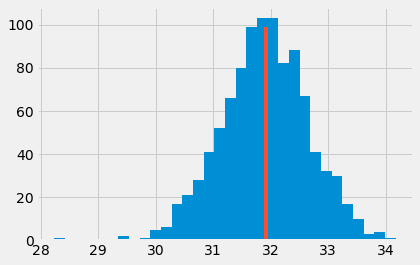

In [30]:
#Enter code here
b=bmi(pima,1000,100,'bmi')
b_df=pd.DataFrame(b,columns=["BMI mean"])
t=round(b_df.shape[0]**0.5)
b_df["BMI mean"].hist(bins=t)
mean_val=pima['bmi'].mean()
b_df_mean=b_df['BMI mean'].mean()
plt.plot(np.full(shape=(100),fill_value=mean_val),np.arange(0,100,1))
print("Mean bmi from sample: ",b_df_mean)
print("Mean bmi from pima: ",mean_val)
#this histogram displays the mean value of bmi taken from a random sample
#it shows that the mean bmi of the sample and the entire dataset is almost the same


**Question 11:** Print the bootstrap approximated 95% confidence interval for the mean bmi of the Pima dataset. (3)

In [38]:
#Enter code here
coni=95/100
arr=np.sort(b_df)
dev=np.std(arr)
mean=arr.mean()
bo={0.99:2.575,0.95:1.96,0.90:1.645}
app=bo[coni]
max_l=mean+(app*dev)
min_l=mean-(app*dev)
print(max_l)
print(min_l)

33.37825215168255
30.42133984831745


**Question 12:** Why does the resampling distribution of the difference in means approach a normal distribution? (2)

It reaches a normal distribution because of the central limit theorm

**Question 13 Part A:** What are some advantages of using the bootstrap sampling method? List them down. (2)

we dont have to keep resampaling and repating the experiment
bootstrap provides a more accurate estimate of a parameter

#Enter comment here

**Question 13 Part B:** Write a reason why using bootstrap sampling method for this dataset might prove to be problematic? (2)

bootstrapping will undervalue the observations
and this method depends largely on the random sample taken from the data